## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Обзор данных

#### Чтение датасета

In [2]:
df = pd.read_csv("../data/dataset_2.csv")

In [3]:
df.head(2)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad


#### Датасет содержит следующие поля

- `Unnamed: 0` - колонка с номером фильма
- `Film` - название фильма
- `Oscar Year` - год получения премии "Оскар"
- `Film Studio/Producer(s)` - студия или продюссерский состав
- `Award` - номинация
- `Year of Release` - год выхода
- `Movie Time` - длительность фильма
- `Movie Genre` - жанр фильма
- `IMDB Rating` - рейтинг на сервисе IMDB
- `IMDB Votes` - количество голосов за фильм на сервисе IMDB
- `Movie Info` - описание фильма
- `Genres` - жанр фильма
- `Critic Consensus` - критика
- `Content Rating` - рейтинг контента
- `Directors` - режиссёры
- `Authors` - авторы сценария
- `Actors` - актёрский состав
- `Original Release Date` - официальная дата выхода фильма
- `Streaming Release Date` - дата выхода на стриминговых платформах
- `Production Company` - площадка выхода
- `Tomatometer Status` - tomatometer статус
- `Tomatometer Rating` - tomatometer рейтинг
- `Tomatometer Count` - счётчик tomatometer 
- `Audience Status` - мнение аудитории
- `Audience Rating` - рейтинг аудитории
- `Audience Count` - количество аудитории
- `Tomatometer Top Critics Count` - top уровень tomatometer рекомендации
- `Tomatometer Fresh Critics Count` - fresh уровень tomatometer рекомендации
- `Tomatometer Rotten Critics Count` - rotten уровень tomatometer рекомендации
- `Film ID` - идентификатор фильма

#### Получение информации о данных в столбцах датафрейма

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

#### Выводы

- Заголовки нужно привести к lower case и заменить разделяющие пробелы на знаки нижнего подчёркивания
- Столбец `Unnamed: 0` требуется удалить
- Столбцы `Movie Genre` и `Genres` нужно объединить
- Данные в столбцах`Year of Release`, `Original Release Date`, `Streaming Release Date` нужно привести к типу даты
- Требуется обработка пропущенных значений
- Требуется обработка дубликатов

## Предварительная обработка данных

#### Форматирование заголовков датафрейма

In [5]:
df.columns = [column.strip().lower().replace(" ", "_").replace("/", "_or_").replace("(s)", "") for column in df.columns]

In [6]:
df.columns

Index(['unnamed:_0', 'film', 'oscar_year', 'film_studio_or_producer', 'award',
       'year_of_release', 'movie_time', 'movie_genre', 'imdb_rating',
       'imdb_votes', 'movie_info', 'genres', 'critic_consensus',
       'content_rating', 'directors', 'authors', 'actors',
       'original_release_date', 'streaming_release_date', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'film_id'],
      dtype='object')

#### Удаление первого столбца из датафрейма

In [7]:
df = df.drop(columns=df.columns[0])

#### Объединение столбцов `movie_genre` и `genres`

In [8]:
df["genre"] = df["genres"] + " " + df["movie_genre"]

In [9]:
df.drop("genres", axis=1, inplace=True)
df.drop("movie_genre", axis=1, inplace=True)

In [10]:
df["genre"]

0         Action & Adventure, Classics Drama,Romance,War
1                                                    NaN
2                                                    NaN
3      Musical & Performing Arts, Romance Drama,Music...
4                                                    NaN
                             ...                        
566                                                  NaN
567                                                  NaN
568                                                  NaN
569                                                  NaN
570                                                  NaN
Name: genre, Length: 571, dtype: object

#### Обработка столбцов с датами

Так как данные о годах получения премии "Оскар" не являются чем-то важным, можно оставить только один год

In [11]:
df["oscar_year"] = df["oscar_year"].apply(lambda year: year[:year.find("/")] if year.find("/") != -1 else year)

In [12]:
df["oscar_year"] = df["oscar_year"].apply(lambda year: str(year) + "-01-01")

In [13]:
df["oscar_year"] = pd.to_datetime(df["oscar_year"], format="%Y-%m-%d")
df["original_release_date"] = pd.to_datetime(df["oscar_year"], format="%Y-%m-%d")
df["streaming_release_date"] = pd.to_datetime(df["oscar_year"], format="%Y-%m-%d")

#### Обработка пропущенных значений

Проверка на наличие пропущенных значений

In [14]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

critic_consensus                    40.630473
audience_status                     23.642732
authors                             23.467601
directors                           23.467601
movie_info                          23.292469
audience_rating                     23.117338
production_company                  23.117338
tomatometer_rating                  23.117338
actors                              23.117338
tomatometer_status                  23.117338
tomatometer_count                   23.117338
content_rating                      23.117338
tomatometer_fresh_critics_count     23.117338
tomatometer_rotten_critics_count    23.117338
audience_count                      23.117338
tomatometer_top_critics_count       23.117338
genre                               23.117338
oscar_year                           0.000000
film_studio_or_producer              0.000000
award                                0.000000
year_of_release                      0.000000
movie_time                        

Недостающие значения найдены в столбцах: `critic_consensus`, `audience_status`, `authors`, `directors`, `movie_info`, `content_rating`, `production_company`, `tomatometer_count`, `actors`, `genre`, `tomatometer_rating`, `audience_rating`, `audience_count`, `tomatometer_top_critics_count`, `tomatometer_fresh_critics_count`, `tomatometer_rotten_critics_count`, `tomatometer_status`

Предположения для заполнения пропущенных значений:

- `critic_consensus` - unknown
- `audience_status` - unknown
- `authors` - unknown
- `directors` - unknown
- `movie_info` - unknown
- `content_rating` - 0.0
- `production_company` - unknown
- `tomatometer_count` - 0.0
- `actors` - unknown
- `genre` - unknown
- `tomatometer_rating` - 0.0
- `audience_rating` - 0.0
- `audience_count` - 0.0
- `tomatometer_top_critics_count` - 0.0
- `tomatometer_fresh_critics_count` - 0.0
- `tomatometer_rotten_critics_count` - 0.0
- `tomatometer_status` - unknown

In [15]:
df["critic_consensus"].fillna("unknown", inplace=True)
df["audience_status"].fillna("unknown", inplace=True)
df["authors"].fillna("unknown", inplace=True)
df["directors"].fillna("unknown", inplace=True)
df["movie_info"].fillna("unknown", inplace=True)
df["content_rating"].fillna(0.0, inplace=True)
df["production_company"].fillna("unknown", inplace=True)
df["tomatometer_count"].fillna(0.0, inplace=True)
df["actors"].fillna("unknown", inplace=True)
df["genre"].fillna("unknown", inplace=True)
df["tomatometer_rating"].fillna(0.0, inplace=True)
df["audience_rating"].fillna(0.0, inplace=True)
df["audience_count"].fillna(0.0, inplace=True)
df["tomatometer_top_critics_count"].fillna(0.0, inplace=True)
df["tomatometer_fresh_critics_count"].fillna(0.0, inplace=True)
df["tomatometer_rotten_critics_count"].fillna(0.0, inplace=True)
df["tomatometer_status"].fillna("unknown", inplace=True)

/tmp/.private/kurpenok/ipykernel_13592/3086897283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["critic_consensus"].fillna("unknown", inplace=True)
/tmp/.private/kurpenok/ipykernel_13592/3086897283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

Проверка правильности решения

In [16]:
df.isna().sum()

film                                0
oscar_year                          0
film_studio_or_producer             0
award                               0
year_of_release                     0
movie_time                          0
imdb_rating                         0
imdb_votes                          0
movie_info                          0
critic_consensus                    0
content_rating                      0
directors                           0
authors                             0
actors                              0
original_release_date               0
streaming_release_date              0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
film_id     

#### Обработка дубликатов

In [17]:
df.duplicated().sum()

np.int64(0)

Дубликатов нет, поэтому обрабатывать их не нужно.

## EDA

#### Описательная статистика датафрейма

In [18]:
df.describe()

,oscar_year,year_of_release,movie_time,imdb_rating,original_release_date,streaming_release_date,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,571,571.000000,571.000000,571.000000,571,571,571.000000,571.000000,571.000000,5.710000e+02,571.000000,571.000000,571.000000
mean,1973-05-13 00:37:49.702276704,1973.357268,124.894921,7.570403,1973-05-13 00:37:49.702276704,1973-05-13 00:37:49.702276704,67.274956,85.106830,63.373030,3.962644e+05,16.807356,75.707531,9.437828
min,1927-01-01 00:00:00,1927.000000,66.000000,5.600000,1927-01-01 00:00:00,1927-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1944-01-01 00:00:00,1944.000000,107.000000,7.300000,1944-01-01 00:00:00,1944-01-01 00:00:00,57.500000,7.000000,53.000000,4.830000e+02,0.000000,6.000000,0.000000
50%,1973-01-01 00:00:00,1972.000000,121.000000,7.600000,1973-01-01 00:00:00,1973-01-01 00:00:00,87.000000,37.000000,81.000000,1.100100e+04,7.000000,32.000000,3.000000
75%,2001-01-01 00:00:00,2001.000000,136.500000,7.900000,2001-01-01 00:00:00,2001-01-01 00:00:00,94.000000,95.500000,88.000000,7.009000e+04,26.000000,88.000000,10.500000
max,2020-01-01 00:00:00,2021.000000,238.000000,9.300000,2020-01-01 00:00:00,2020-01-01 00:00:00,100.000000,574.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000
std,NaN,29.315738,26.322817,0.559652,NaN,NaN,38.318101,114.728256,36.075884,3.183439e+06,21.074089,103.227361,17.702044


#### Тепловая карта корреляций

<Axes: >

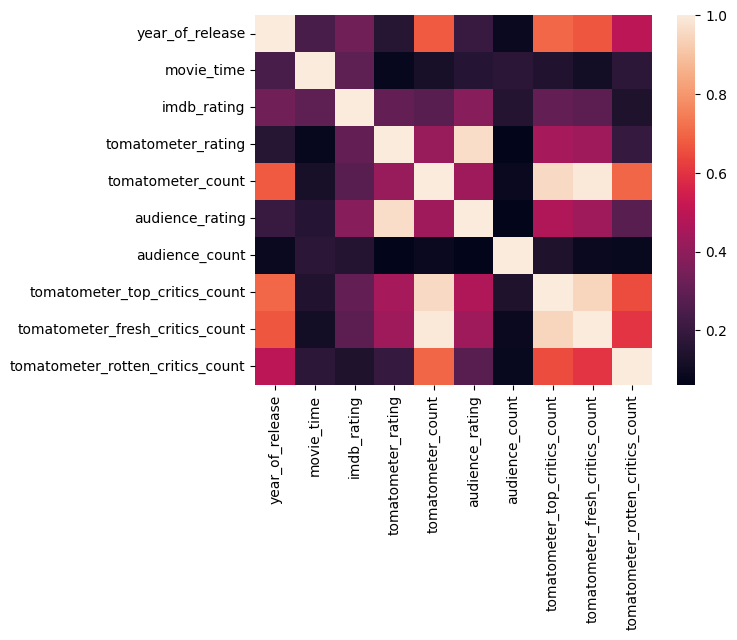

In [19]:
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr())

На графике видно, что `tomatometer_fresh_critics_count`, `tomatometer_top_critics_count` и `tomatometer_count` сильно коррелируют. Оно и не удивительно - скорее всего, `tomatometer_fresh_critics_count` и `tomatometer_top_critics_count` являются лишь степенью параметра `tomatometer_count`.

Помимо этого коррелируют `tomatometer_count` и `year_of_release`. Это, возможно, говорит о том, что фильмы, выпущенные в определённый период времени, считались и считаются качественными и проработанными, а поэтому высоко оцениваются пользователями сервиса IMDB.

#### Гистограммы по данным

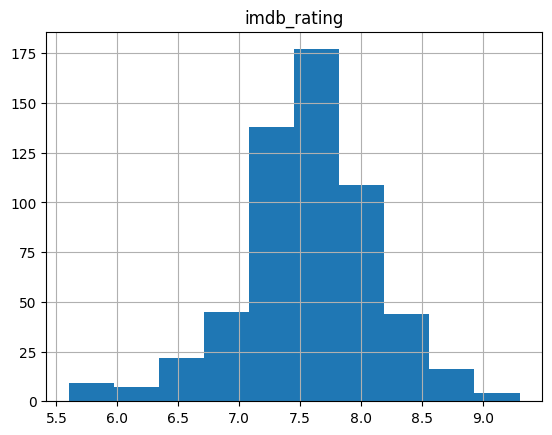

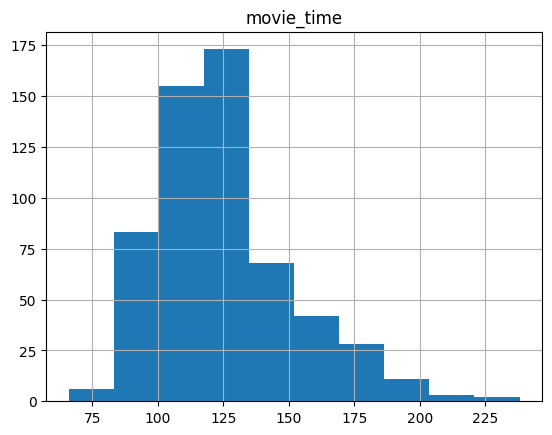

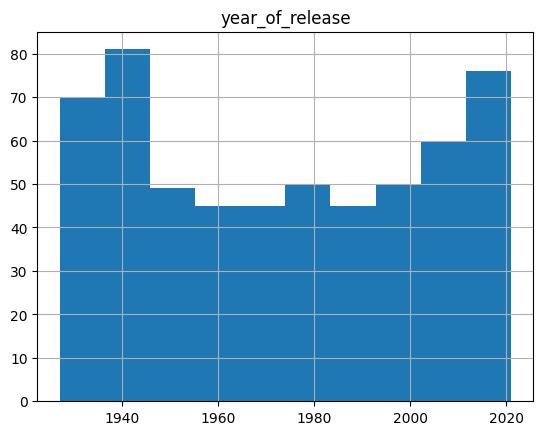

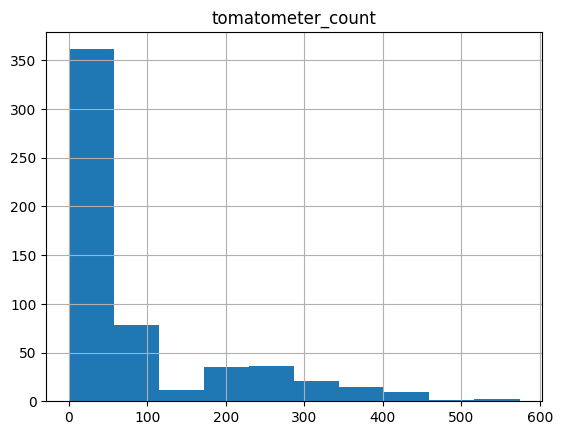

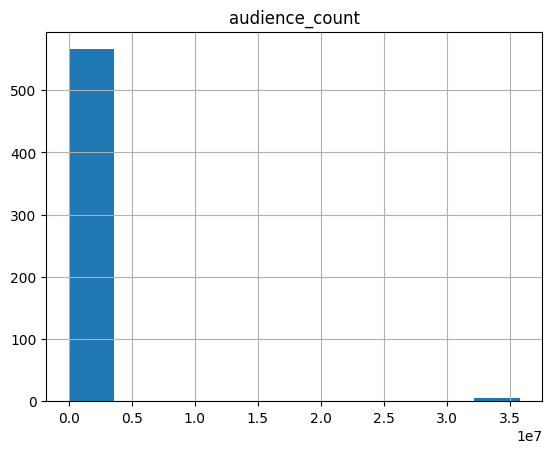

In [20]:
columns = ["imdb_rating", "movie_time", "year_of_release", "tomatometer_count", "audience_count"]

for column in columns:
    df.hist(column)

На графиках выше видно, что данныев в гистограммах `tomatometer_count`, `audience_count` данные сильно смещены влево. Нужно устранить выбросы.

#### Устранение выбросов

In [21]:
outliers = df[["tomatometer_count", "audience_count"]]

In [22]:
q1 = outliers.quantile(0.25)
q3 = outliers.quantile(0.75)

iqr = q3 - q1

filtered_df = outliers[~((outliers < (q1 - 1.5 * iqr)) | (outliers > (q3 + 1.5 * iqr))).any(axis=1)]

In [23]:
index_list = list(filtered_df.index.values)
filtered_df = df[df.index.isin(index_list)]

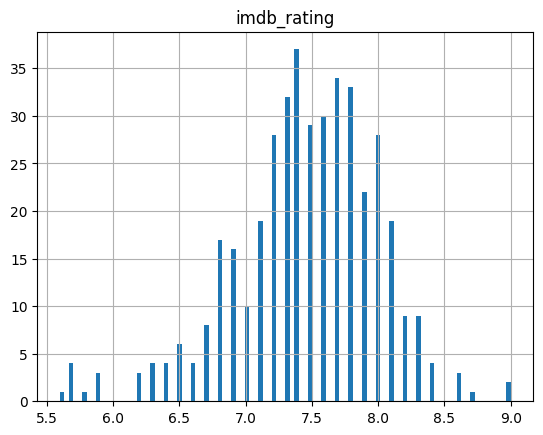

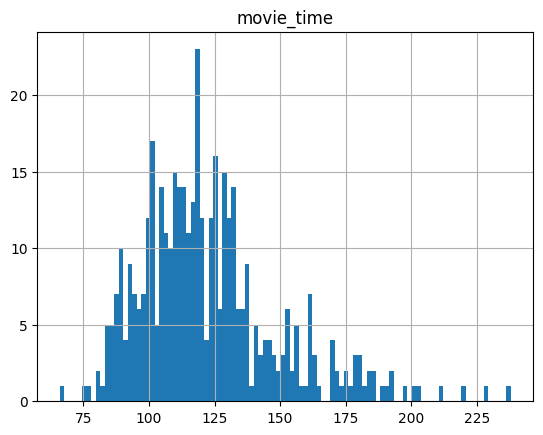

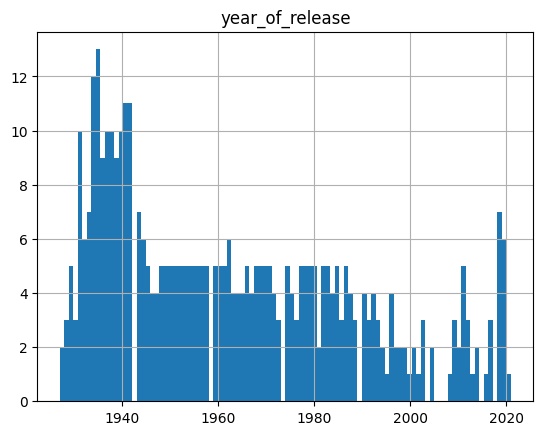

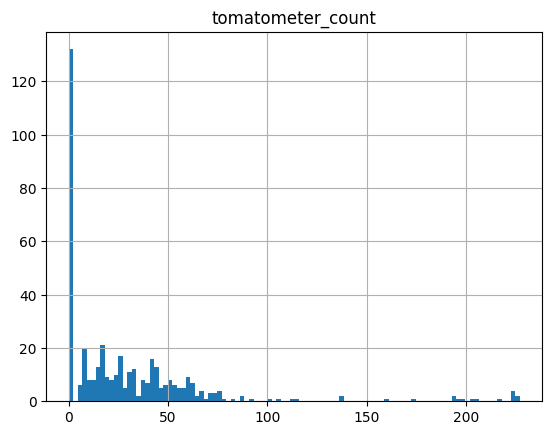

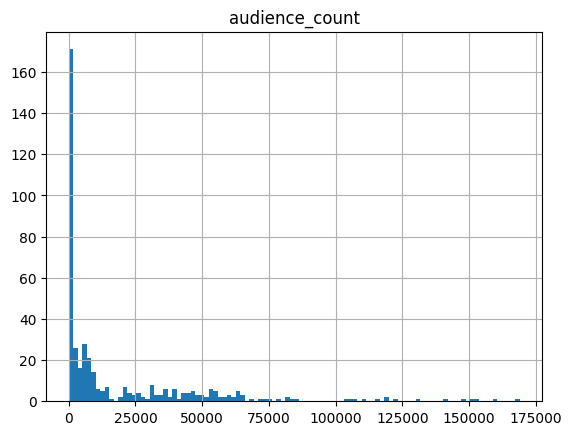

In [24]:
for column in columns:
    filtered_df.hist(column, bins=100)

#### Зависимость между рейтингом фильма и его оценками

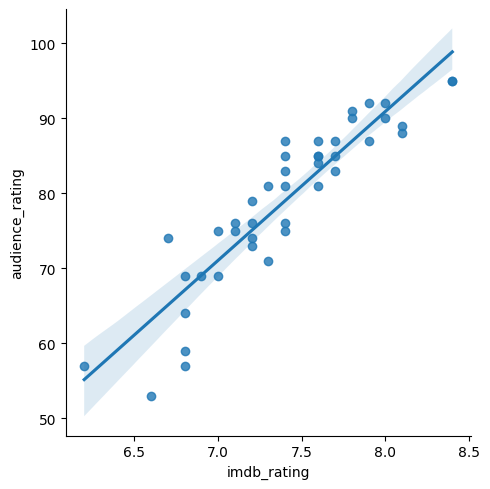

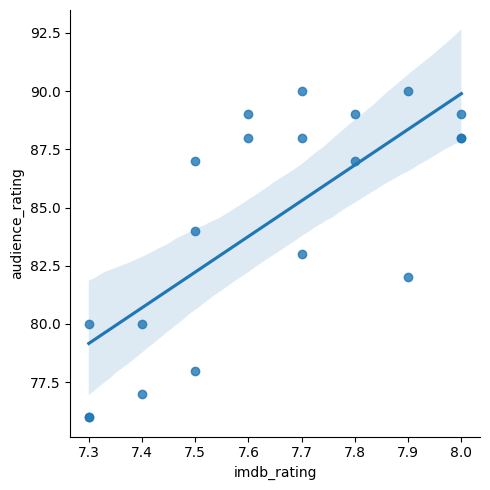

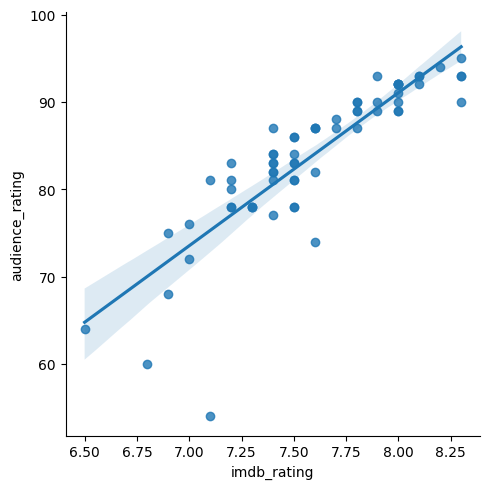

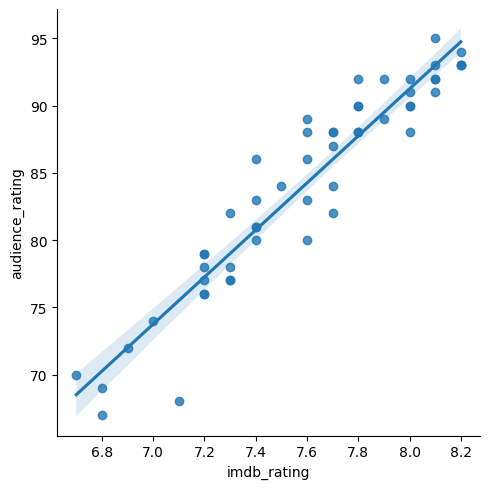

In [25]:
sns.lmplot(filtered_df[filtered_df["content_rating"] == "G"], x="imdb_rating", y="audience_rating")
sns.lmplot(filtered_df[filtered_df["content_rating"] == "PG-13"], x="imdb_rating", y="audience_rating")
sns.lmplot(filtered_df[filtered_df["content_rating"] == "PG"], x="imdb_rating", y="audience_rating")
sns.lmplot(filtered_df[filtered_df["content_rating"] == "R"], x="imdb_rating", y="audience_rating")

По графику выше можно сделать вывод, что оценки IMDB и Audience сильно связаны.

#### Сравнение категорий рейтинга

<Axes: title={'center': 'audience_rating'}, xlabel='content_rating'>

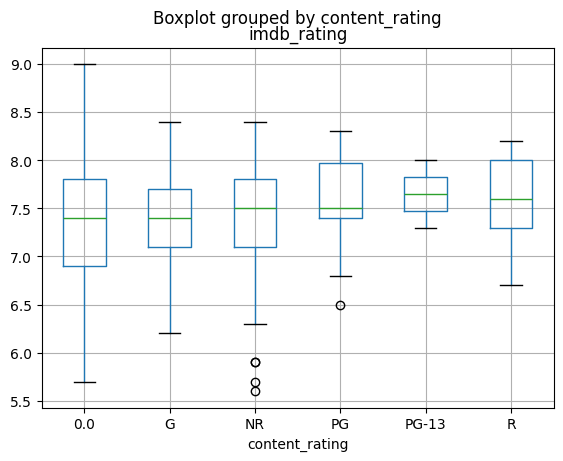

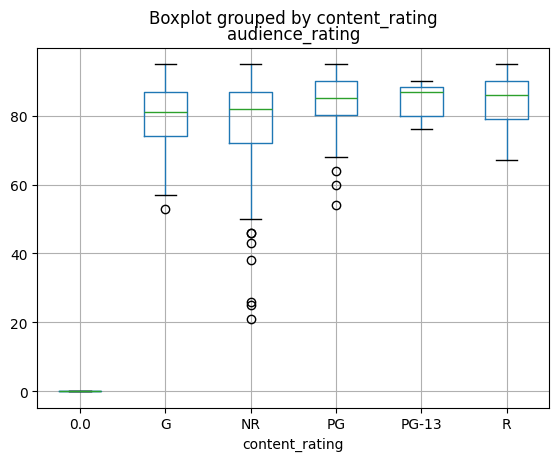

In [26]:
filtered_df.boxplot(by="content_rating", column="imdb_rating", grid=True)
filtered_df.boxplot(by="content_rating", column="audience_rating", grid=True)

На графиках выше видно, что категории PG, PG-13 и R оценки вцелом выше чем у остальных категорий и между собой почти равны, но у R количество более низких оценок больше чем PG.